In [113]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os
from tensorflow.keras.utils import load_img,img_to_array

In [114]:
np.random.seed(1234)
path = '/Users/omgoswami/Desktop/ECG_stuffs/train'
img_list = os.listdir(path)
labels = [i for i in range(len(img_list))]
label_dict = {
    'ECG Images of Myocardial Infarction Patients (240x12=2880)': 0,
    'ECG Images of Patient that have History of MI (172x12=2064)': 1,
    'ECG Images of Patient that have abnormal heartbeat (233x12=2796)': 2,
    'Normal Person ECG Images (284x12=3408)': 3
}

data = []
label = []

for cat in img_list:
    pic_list = os.path.join(path, cat)
    
    # Check if the item in the directory is a subdirectory
    if os.path.isdir(pic_list):
        for img in os.listdir(pic_list):
            image_path = os.path.join(pic_list, img)
            
            # Check if the item is a file
            if os.path.isfile(image_path):
                image = cv2.imread(image_path)
                image = image[300:1480, 150:2125]
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (224, 224))
                data.append(image)
                label.append(label_dict[cat])

print("Total images processed:", len(data))

Total images processed: 928


In [115]:
data=np.array(data)
data.shape

(928, 224, 224, 3)

In [116]:
label=np.array(label)
label.shape

(928,)

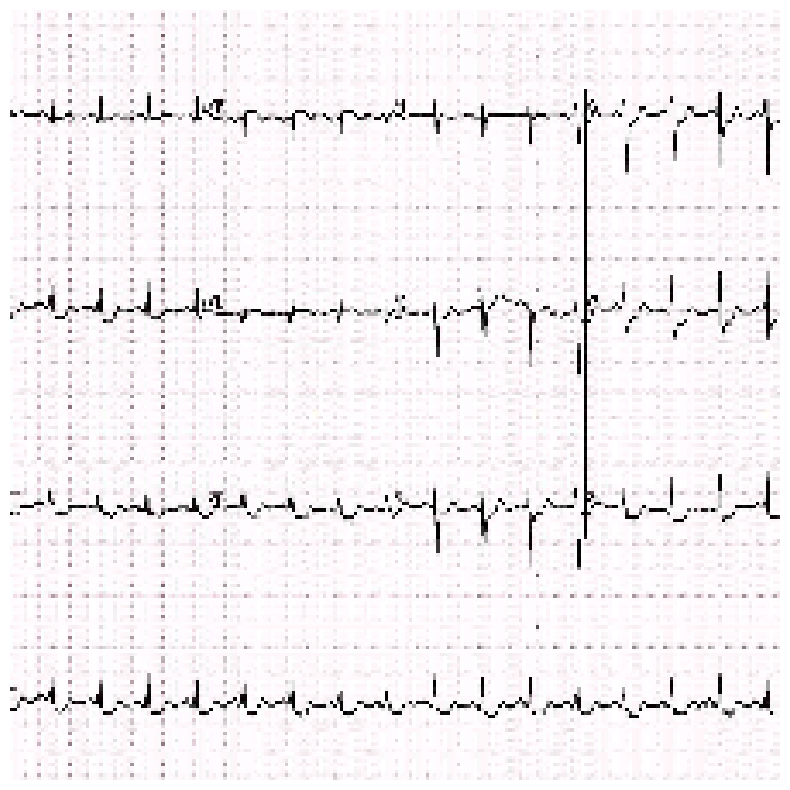

In [117]:
import matplotlib.pyplot as plt

# Assuming data is already defined as a numpy array with shape (928, 224, 224, 3)
image_to_show = data[0]
fig, ax = plt.subplots(figsize=(10, 10))
# Display the image
plt.imshow(image_to_show)
plt.axis('off')  # Turn off axis labels
plt.show()

In [118]:
import keras
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, BatchNormalization, Flatten,Conv2D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0,EfficientNetB3

In [119]:
num_classes = 4
label = keras.utils.to_categorical(label, num_classes)

In [120]:
from sklearn.utils import shuffle

data, label = shuffle(data, label, random_state=42)

In [121]:
model = EfficientNetB0(include_top=True, weights=None, input_shape=(224, 224, 3), classes=4)

In [122]:
model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_14 (Rescaling)       (None, 224, 224, 3)  0           ['input_12[0][0]']               
                                                                                                  
 normalization_11 (Normalizatio  (None, 224, 224, 3)  7          ['rescaling_14[0][0]']           
 n)                                                                                               
                                                                                     

                                                                                                  
 block2a_project_bn (BatchNorma  (None, 56, 56, 24)  96          ['block2a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_expand_conv (Conv2D)   (None, 56, 56, 144)  3456        ['block2a_project_bn[0][0]']     
                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 56, 56, 144)  576        ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_expand_activation (Act  (None, 56, 56, 144)  0          ['block2b_expand_bn[0][0]']      
 ivation) 

 ization)                                                                                         
                                                                                                  
 block3b_expand_activation (Act  (None, 28, 28, 240)  0          ['block3b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3b_dwconv (DepthwiseConv2  (None, 28, 28, 240)  6000       ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 28, 28, 240)  960        ['block3b_dwconv[0][0]']         
 )                                                                                                
          

                                                                                                  
 block4b_bn (BatchNormalization  (None, 14, 14, 480)  1920       ['block4b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4b_activation (Activation  (None, 14, 14, 480)  0          ['block4b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4b_s

 )                                                                                                
                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 480)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block5a_se_reduce[0][0]']      
          

                                                                                                  
 block5c_se_excite (Multiply)   (None, 14, 14, 672)  0           ['block5c_activation[0][0]',     
                                                                  'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 14, 14, 112)  75264       ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 14, 14, 112)  448        ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_drop (Dropout)         (None, 14, 14, 112)  0           ['block5c_project_bn[0][0]']     
          

 lization)                                                                                        
                                                                                                  
 block6b_drop (Dropout)         (None, 7, 7, 192)    0           ['block6b_project_bn[0][0]']     
                                                                                                  
 block6b_add (Add)              (None, 7, 7, 192)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block6c_expand_conv[0][0]']    
 ization) 

                                                                  'block6c_add[0][0]']            
                                                                                                  
 block7a_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6d_add[0][0]']            
                                                                                                  
 block7a_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block7a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 7, 7, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block7a_d

In [123]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001),metrics=['accuracy'])

In [124]:
history=model.fit(data,label,batch_size=16,epochs=25, validation_split=0.1)

Epoch 1/25
53/53 [==============================] - 85s 1s/step - loss: 1.3502 - accuracy: 0.5497 - val_loss: 1.7347 - val_accuracy: 0.3656
Epoch 2/25
53/53 [==============================] - 40s 754ms/step - loss: 0.5639 - accuracy: 0.7880 - val_loss: 2.4682 - val_accuracy: 0.3656
Epoch 3/25
53/53 [==============================] - 27s 505ms/step - loss: 0.3471 - accuracy: 0.8635 - val_loss: 3.7650 - val_accuracy: 0.3656
Epoch 4/25
53/53 [==============================] - 32s 601ms/step - loss: 0.3203 - accuracy: 0.8623 - val_loss: 4.6328 - val_accuracy: 0.3656
Epoch 5/25
53/53 [==============================] - 25s 465ms/step - loss: 0.2920 - accuracy: 0.8802 - val_loss: 4.9046 - val_accuracy: 0.1828
Epoch 6/25
53/53 [==============================] - 25s 454ms/step - loss: 0.2745 - accuracy: 0.8958 - val_loss: 6.6353 - val_accuracy: 0.1828
Epoch 7/25
53/53 [==============================] - 27s 507ms/step - loss: 0.2085 - accuracy: 0.9102 - val_loss: 5.3581 - val_accuracy: 0.3656
Ep

In [125]:
np.random.seed(1234)
path_test = '/Users/omgoswami/Desktop/ECG_stuffs/test'
img_list_test = os.listdir(path)
labels_test = [i for i in range(len(img_list))]
label_dict_test = {
    'ECG Images of Myocardial Infarction Patients (240x12=2880)': 0,
    'ECG Images of Patient that have History of MI (172x12=2064)': 1,
    'ECG Images of Patient that have abnormal heartbeat (233x12=2796)': 2,
    'Normal Person ECG Images (284x12=3408)': 3
}

data_test = []
label_test = []

for cat_test in img_list_test:
    pic_list_test = os.path.join(path_test, cat_test)
    
    # Check if the item in the directory is a subdirectory
    if os.path.isdir(pic_list_test):
        for img_test in os.listdir(pic_list_test):
            image_path_test = os.path.join(pic_list_test, img_test)
            
            # Check if the item is a file
            if os.path.isfile(image_path_test):
                image_test = cv2.imread(image_path_test)
                image_test = image_test[300:1480, 150:2125]
                image_test = cv2.cvtColor(image_test, cv2.COLOR_BGR2RGB)
                image_test = cv2.resize(image_test, (224, 224))
                data_test.append(image_test)
                label_test.append(label_dict_test[cat_test])

print("Total images processed:", len(data_test))

Total images processed: 448


In [126]:
data_test=np.array(data_test)
data_test.shape

(448, 224, 224, 3)

In [127]:
label_test=np.array(label_test)
label_test.shape

(448,)

In [128]:
num_classes = 4
label_test = keras.utils.to_categorical(label_test, num_classes)
label_test.shape

(448, 4)

In [129]:
_, acc = model.evaluate(data_test, label_test)

14/14 [==============================] - 8s 377ms/step - loss: 0.6548 - accuracy: 0.8371


In [130]:
y_pred=model.predict(data_test)
y_pred=np.argmax(y_pred, axis=1)
y_pred

14/14 [==============================] - 7s 246ms/step


array([1, 2, 2, 1, 2, 2, 3, 3, 2, 3, 3, 1, 1, 3, 2, 3, 2, 2, 2, 1, 3, 3,
       3, 1, 2, 3, 1, 1, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2,
       3, 1, 1, 3, 3, 1, 1, 1, 3, 3, 2, 2, 3, 3, 2, 2, 1, 2, 2, 1, 3, 3,
       2, 2, 3, 3, 1, 3, 3, 2, 3, 2, 3, 3, 1, 3, 1, 3, 2, 1, 1, 3, 2, 1,
       3, 3, 1, 3, 2, 3, 3, 2, 3, 1, 3, 3, 2, 3, 2, 2, 2, 2, 1, 2, 3, 3,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [131]:
model.save("ECG_ECN.h5")